<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/02_1_Exploratory_final_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Total_staff_by_employee.csv .

import pandas as pd
staff = pd.read_csv('Total_staff_by_employee.csv', sep=';')

# Exploratory analysis of the random data generated as Staff Data

In this notebook we are going to analyze the data we have generate for our analysis from the real data we had. This data represents a company staff a row by employee. We have a final column which stays if the employee has had any accident

Columns in our dataframe:

- Codigo accidentado
- Turno
- Gender
- Planta
- Tipo accidente
- Tipo trabajador
- Fabrica
- Tecnología
- Pais
- Horas Presencia Efectiva Subcontratados
- Horas Presencia Efectiva ETTs
- Horas Formacion Seguridad Propios
- Horas Formacion Seguridad ETTs
- Accident
- wk_position
- Age
- Severity
- Accident_place

In [38]:
staff.drop(columns={'Unnamed: 0'}, inplace=True)
staff.head(15)

,Codigo accidentado,Turno,Gender,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place
0,HS-CLMB_2546,Turno de mañana,Hombre,20,Accidente c/b,ETT,Burgos,Skinpass,España,25249.0,42484.0,1419.3,830.1,Yes,Material Handler,Entre 30-50,Leve,Mantenimiento
1,HS-CEPA_2563,Turno de mañana,Hombre,19,Accidente c/b,Indefinido,Burgos,Recocido,España,25249.0,42484.0,1419.3,830.1,Yes,customer,Mayor 50,Muy grave,Mantenimiento
2,HS-GNVT_2564,Turno de tarde,Hombre,12,Accidente s/b,Duración Determinada,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,Yes,Vaciado contenedores de chatarra,Entre 30-50,Muy grave,Mantenimiento
3,HS-GNVT_2565,Turno de mañana,Hombre,12,Incidente,ETT,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,Yes,Pontonero,Entre 30-50,Grave,Mantenimiento
4,HS-DNGG_2566,Turno de mañana,Hombre,41,Incidente,Incidente (no aplica),Hiasa,Corte Láser,España,0.0,167848.0,1300.5,101.5,Yes,Longi 2,Entre 30-50,Grave,Mantenimiento
5,HS-SAUS_2577,Turno de mañana,Hombre,7,Incidente,Indefinido,Barcelona,Cizalla,España,25684.5,18302.3,1150.6,151.5,Yes,Operator / Stacker Operator,Mayor 50,Muy grave,Mantenimiento
6,HS-BRCL_3127,Turno de tarde,Hombre,1,Incidente,Incidente (no aplica),Argentina,Blanking,Argentina,0.0,0.0,606.5,0.0,Yes,Slitter Op,Entre 30-50,Grave,Mantenimiento
7,HS-BRCL_3220,Turno de tarde,Hombre,1,Incidente,Indefinido,Argentina,Blanking,Argentina,0.0,0.0,606.5,0.0,Yes,Gantry crane operator,Mayor 50,Muy grave,Mantenimiento
8,HS-BRCL_3221,Turno de tarde,Hombre,1,Incidente,Incidente (no aplica),Argentina,Blanking,Argentina,0.0,0.0,606.5,0.0,Yes,Verpackerin,Mayor 50,Muy grave,Mantenimiento
9,HS-NVRR_3222,Turno de mañana,Hombre,13,Incidente,Incidente (no aplica),Burgos,Blanking,España,25249.0,42484.0,1419.3,830.1,Yes,assistant of operator,Entre 30-50,Leve,Mantenimiento


In [39]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place'],
      dtype='object')

In [40]:
staff.shape

(21210, 18)

In [41]:
#number of employees
len(staff)

21210

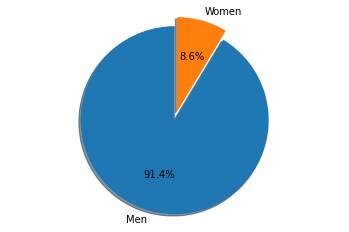

In [42]:
import matplotlib.pyplot as plt

labels = 'Men', 'Women'
sizes = [len(staff[staff['Gender']=='Hombre']), len(staff[staff['Gender']=='Mujer'])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [43]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place'],
      dtype='object')

In [44]:
staff['N employees'] = 1

In [63]:
# we are going to aggregate the data in order to be able to plot it in a clear way

n_employees = staff.groupby(by=[ 'Gender', 'Planta', 'Tipo accidente',
        'Fabrica', 'Tecnología',
       'Accident','Severity']).agg('sum')


In [64]:
n_employees

Horas Presencia Efectiva Subcontratados  ...  N employees
Gender Planta Tipo accidente Fabrica   Tecnología        Accident Severity                                            ...             
Hombre 1      Accidente c/b  Argentina Blanking          No       Grave                                          0.0  ...           53
                                                                  Leve                                           0.0  ...           41
                                                                  Muy grave                                      0.0  ...           43
                                                         Yes      Grave                                          0.0  ...           11
                                                                  Leve                                           0.0  ...            8
...                                                                                                              ...  ...          ...
Mujer  84     Accidente s/b  Tarragona Corte Transversal No       Leve                                       78112.0  ...            4
                                                                  Muy grave                                  58584.0  ...            3
              Incidente      Tarragona Corte Transversal No       Grave                                     136696.0  ...            7
                                                                  Leve                                       78112.0  ...            4
                                                                  Muy grave                                 117168.0  ...            6

[982 rows x 5 columns]